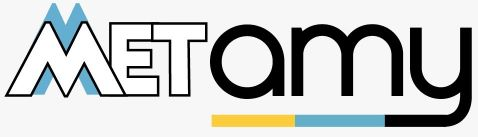

# METAMY DATA ANALYTICS MODULE CAPSTONE PROJECT

# Real Estate Market Analysis

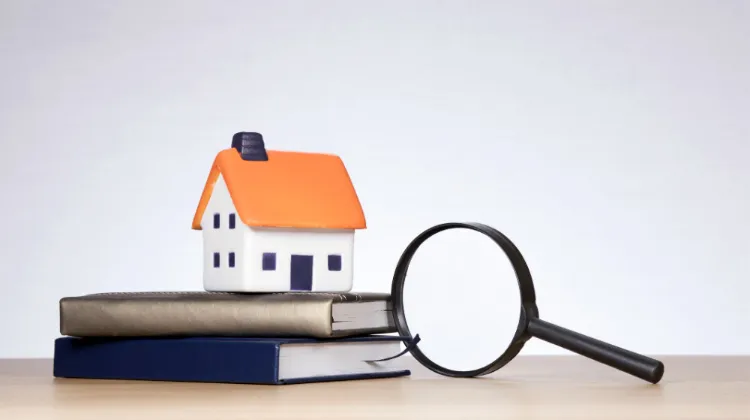

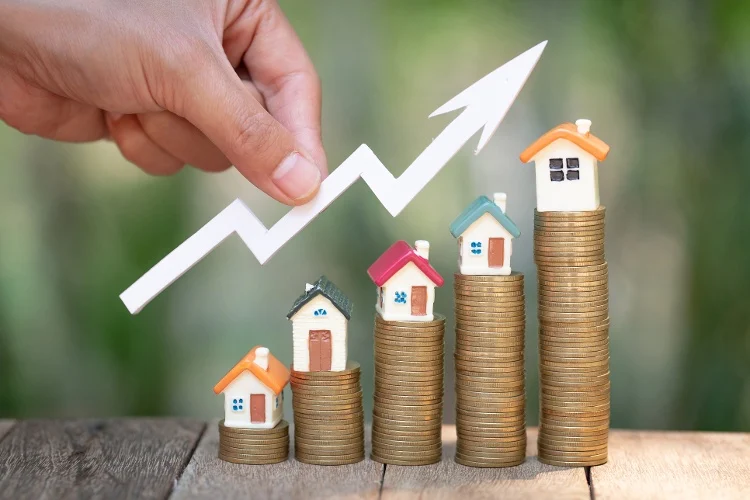

**The Phases of the Exploratory Data Analysis(Alternative-1)**

**1. Getting to Know Dataset**<br><br>
    - Initial Exploration<br>
    - Data Validation<br>
    - Data Summarization<br><br><br>
**2. Data Cleaning and Imputation**<br><br>
    - Addressing with Missing Data<br>
    - Converting and Analyzing Missing Data<br>
    - Working with Numeric Data<br>
    - Handling Outliers<br><br><br>
**3. Relationship in Data**<br><br>
    - Patterns Over Time<br>
    - Correlation<br>
    - Factor Relationships and Distributions<br><br><br>
**4. Turning EDA into Action**<br><br>
    - Considerations for Categorical Data<br>
    - Generating New Features<br>
    - Generating Hypotheses<br><br><br>


    

**The Phases of the Exploratory Data Analysis(Alternative-2)**

**1. Data Preprocessing**<br><br>
    - Properties and Customers<br>
    - Combining the Two Datasets<br><br><br>
**2. Descriptive Statistics**<br><br>
    - Breakdown by Building<br>
    - Breakdown by Country<br>
    - Breakdown by State<br><br><br>
**3. Data Analysis**<br><br>
    - Analyzing Age<br>
    - Analyzing Properties<br>
    - Relationship between Properties<br><br><br>
**4. Data Visualization**<br><br><br>
**5. Data Interpretation**<br><br>

    

## Data Preprocessing

- The initial stage involves cleaning and preparing the data for real estate analysis, including handling missing values, correcting inconsistencies, and transforming data types if necessary.<br><br> 

- You must clean and preprocess the <code>customers</code> and <code>property</code> tables, ensure column names are in order and that missing values appear correctly, and apply any column data type changes you see fit.<br><br> 

- Finally, you should combine the <code>properties</code>  and <code>customers</code> tables into one unified real estate dataset using the shared customer_id column. You must consolidate inconsistencies or missing values to perform the following analysis and obtain the correct results.

### Properties and Customers

You must review the list, preprocess, and clean both datasets accordingly.

1. **Descriptive statistics:** You can start the analysis with descriptive statistics of the data and check for missing values.<br><br>
2. **Datatypes:** Evaluate the datatypes of the columns and decide whether some of the datatypes need to be changed.<br><br>
3. **Column names:** Check if there is an issue with any column names and rename them if necessary.<br><br>
4. **Categorical to numerical:** Change categorical values to numeric when possible and needed. Use the 0 1 convention when mapping.<br><br>
5. **Case:** If there are inconsistencies with Capitol and lowercases, unify them using the lowercase convention.<br><br>
6. **Missing values:** Ensure missing values are correctly indicated.<br><br>
7. **Date variables:** Make sure you handle and transform the date variables as a date.

In [1607]:
# import related libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# in order to set the parameters that control the general style of the plots. 
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# in order to set the value of the specified option.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# to set it "100" to display all rows in the dataframe
pd.set_option('display.max_rows', 150)

#  to set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [1608]:


#!pip install pypyodbc
import pypyodbc 


###**Connection with Windows Authentication**

conn = pypyodbc.connect(
  "Driver={SQL Server};"
  "Server={DESKTOP-REJUTDN\SQLEXPRESS};"
  "Database={Real_Estate};"
  "{Trusted_Connection=True};"
)

In [1565]:
customers_clean=pd.read_sql_query("SELECT * FROM dbo.customers_clean",conn)
customers_clean

C:\Users\FEYZA\AppData\Local\Temp\ipykernel_7568\315017730.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_clean=pd.read_sql_query("SELECT * FROM dbo.customers_clean",conn)


,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,None,None,USA,California,Investment,5,False,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,True,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,False,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,False,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,False,Website


In [1609]:
properties_clean=pd.read_sql_query("SELECT * FROM dbo.properties_clean",conn)
properties_clean

C:\Users\FEYZA\AppData\Local\Temp\ipykernel_7568\3500395327.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  properties_clean=pd.read_sql_query("SELECT * FROM dbo.properties_clean",conn)


,id,building,date_sale,type,property,area,price,status,customerid,area_m2
0,1030,1,11/1/2005,Apartment,30,743.09,24617268.00,Sold,28,69.04
1,1029,1,10/1/2005,Apartment,29,756.21,24633190.00,Sold,27,70.25
2,2002,2,7/1/2007,Apartment,2,587.28,20928091.00,Sold,112,54.56
3,2031,2,12/1/2007,Apartment,31,1604.75,45266701.00,Sold,160,149.09
4,1049,1,11/1/2004,Apartment,49,1375.45,46708331.00,Sold,14,127.78
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,32261074.00,-,None,115.07
263,5047,5,#NUM!,Apartment,47,794.52,27919126.00,-,None,73.81
264,5048,5,#NUM!,Apartment,48,1013.27,28799653.00,-,None,94.14
265,5050,5,#NUM!,Apartment,50,1074.71,36586878.00,-,None,99.84


In [1566]:
customers=customers_clean

In [1610]:
properties=properties_clean

In [1568]:
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage               bool
source               object
dtype: object

In [1569]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,None,None,USA,California,Investment,5,False,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,True,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,False,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,False,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,False,Website


In [1570]:
customers["birth_date"]=pd.to_datetime(customers_clean["birth_date"],errors="coerce")

In [1571]:
customers["birth_date"].dtype

dtype('<M8[ns]')

In [1572]:
customers["birth_date"]=customers_clean["birth_date"].dt.strftime('%d.%m.%Y')

In [1573]:
customers["birth_date"].dtype

dtype('O')

In [1574]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,11.05.1968,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,26.11.1962,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,07.04.1959,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,25.11.1959,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,NaN,None,USA,California,Investment,5,False,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,03.12.1979,F,USA,Virginia,Investment,3,True,Agency
158,138,Individual,Colin,Campos,14.04.1942,M,USA,California,Home,3,False,Website
159,113,Individual,Anya,Stephenson,11.06.1959,F,USA,California,Home,4,False,Website
160,147,Individual,Parker,Poole,10.11.1951,M,USA,California,Home,5,False,Website


In [1575]:
customers["birth_date"]=pd.to_datetime(customers["birth_date"],format='%d.%m.%Y',errors="coerce")
customers["birth_date"]

0     1968-05-11
1     1962-11-26
2     1959-04-07
3     1959-11-25
4            NaT
         ...    
157   1979-12-03
158   1942-04-14
159   1959-06-11
160   1951-11-10
161   1953-09-15
Name: birth_date, Length: 162, dtype: datetime64[ns]

In [1576]:
customers_copy=customers.copy()

#### customers DataFrame👇

In [1577]:
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5,False,Website


In [1578]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    object        
 1   entity             162 non-null    object        
 2   name               162 non-null    object        
 3   surname            162 non-null    object        
 4   birth_date         155 non-null    datetime64[ns]
 5   sex                155 non-null    object        
 6   country            162 non-null    object        
 7   state              154 non-null    object        
 8   purpose            162 non-null    object        
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    bool          
 11  source             162 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(9)
memory usage: 14.2+ KB


In [1579]:
customers["mortgage"]=customers["mortgage"].astype("int")

In [1580]:
customers["mortgage"]=customers["mortgage"].astype("object")

In [1581]:
customers["sex"].value_counts(dropna=False)

sex
M       87
F       68
None     7
Name: count, dtype: int64

In [1582]:
customers["entity"].value_counts(dropna=False)

entity
Individual    155
Company         7
Name: count, dtype: int64

In [1583]:
customers["purpose"].value_counts(dropna=False)

purpose
Home          112
Investment     50
Name: count, dtype: int64

In [1584]:
customers["state"].value_counts(dropna=False)

state
California    100
Nevada         14
Colorado       11
Arizona        10
Oregon          9
None            8
Utah            5
Virginia        3
Wyoming         1
Kansas          1
Name: count, dtype: int64

In [1586]:
customers["country"].value_counts(dropna=False)

country
USA        146
USA          4
Russia       4
Belgium      2
UK           2
Canada       1
Germany      1
Mexico       1
Denmark      1
Name: count, dtype: int64

In [1587]:
customers["country"].unique()

array(['USA', 'USA ', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia',
       'UK', 'Denmark'], dtype=object)

In [1588]:
customers[customers["country"]=='USA ']

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
4,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5,0,Website
59,142,Individual,Kassidy,Vega,1972-05-07,F,USA,California,Home,5,0,Website
99,150,Individual,Emmett,Estes,1969-06-05,M,USA,California,Home,3,0,Website
143,44,Individual,Ramiro,Oneill,1954-09-29,M,USA,California,Home,4,0,Agency


In [1589]:
customers["country"].replace('USA ',"USA",inplace=True)

In [1590]:
customers.isnull().sum()

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [1591]:
customers["country"].value_counts(dropna=False)

country
USA        150
Russia       4
Belgium      2
UK           2
Canada       1
Germany      1
Mexico       1
Denmark      1
Name: count, dtype: int64

In [1592]:
customers["customerid"]=customers["customerid"].astype("int64")

In [1593]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    int64         
 1   entity             162 non-null    object        
 2   name               162 non-null    object        
 3   surname            162 non-null    object        
 4   birth_date         155 non-null    datetime64[ns]
 5   sex                155 non-null    object        
 6   country            162 non-null    object        
 7   state              154 non-null    object        
 8   purpose            162 non-null    object        
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    object        
 11  source             162 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 15.3+ KB


In [1594]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,1,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,0,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,1,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,0,Website
4,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5,0,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,1,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,0,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,0,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,0,Website


In [1595]:
customers["state"].replace(to_replace="None",value=np.nan,inplace=True)

In [1596]:
customers["sex"].replace(to_replace="None",value=np.nan,inplace=True)

In [1597]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,1,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,0,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,1,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,0,Website
4,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5,0,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,1,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,0,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,0,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,0,Website


In [1598]:
customers.to_csv('customers.csv', index=False)

#### properties DataFrame👇

In [1611]:
properties.head()

,id,building,date_sale,type,property,area,price,status,customerid,area_m2
0,1030,1,11/1/2005,Apartment,30,743.09,24617268.00,Sold,28,69.04
1,1029,1,10/1/2005,Apartment,29,756.21,24633190.00,Sold,27,70.25
2,2002,2,7/1/2007,Apartment,2,587.28,20928091.00,Sold,112,54.56
3,2031,2,12/1/2007,Apartment,31,1604.75,45266701.00,Sold,160,149.09
4,1049,1,11/1/2004,Apartment,49,1375.45,46708331.00,Sold,14,127.78


In [1612]:
properties["status"].value_counts(dropna=False)

status
Sold     195
-         72
Name: count, dtype: int64

In [1613]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          267 non-null    int64  
 1   building    267 non-null    int64  
 2   date_sale   267 non-null    object 
 3   type        267 non-null    object 
 4   property    267 non-null    int64  
 5   area        267 non-null    float64
 6   price       267 non-null    float64
 7   status      267 non-null    object 
 8   customerid  195 non-null    object 
 9   area_m2     267 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 21.0+ KB


In [1614]:
properties.isnull().sum()

id             0
building       0
date_sale      0
type           0
property       0
area           0
price          0
status         0
customerid    72
area_m2        0
dtype: int64

In [1615]:
properties["status"].replace("-",0,inplace=True)

In [1616]:
properties["status"].replace("Sold ",1,inplace=True)

In [1617]:
properties["status"].value_counts(dropna=False)

status
1    195
0     72
Name: count, dtype: int64

In [1618]:
properties.rename(columns={"status": "sold"}, inplace=True)

In [1619]:
properties

,id,building,date_sale,type,property,area,price,sold,customerid,area_m2
0,1030,1,11/1/2005,Apartment,30,743.09,24617268.00,1,28,69.04
1,1029,1,10/1/2005,Apartment,29,756.21,24633190.00,1,27,70.25
2,2002,2,7/1/2007,Apartment,2,587.28,20928091.00,1,112,54.56
3,2031,2,12/1/2007,Apartment,31,1604.75,45266701.00,1,160,149.09
4,1049,1,11/1/2004,Apartment,49,1375.45,46708331.00,1,14,127.78
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,32261074.00,0,None,115.07
263,5047,5,#NUM!,Apartment,47,794.52,27919126.00,0,None,73.81
264,5048,5,#NUM!,Apartment,48,1013.27,28799653.00,0,None,94.14
265,5050,5,#NUM!,Apartment,50,1074.71,36586878.00,0,None,99.84


In [1620]:
properties["date_sale"]=pd.to_datetime(properties["date_sale"],errors="coerce")

In [1621]:
properties["date_sale"].dtype

dtype('<M8[ns]')

In [1622]:
properties["date_sale"]=properties["date_sale"].dt.strftime('%d.%m.%Y')

In [1623]:
properties["date_sale"]=pd.to_datetime(properties["date_sale"],format='%d.%m.%Y',errors="coerce")
properties["date_sale"]

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [1624]:
properties["date_sale"].dtype

dtype('<M8[ns]')

In [1625]:
properties

,id,building,date_sale,type,property,area,price,sold,customerid,area_m2
0,1030,1,2005-11-01,Apartment,30,743.09,24617268.00,1,28,69.04
1,1029,1,2005-10-01,Apartment,29,756.21,24633190.00,1,27,70.25
2,2002,2,2007-07-01,Apartment,2,587.28,20928091.00,1,112,54.56
3,2031,2,2007-12-01,Apartment,31,1604.75,45266701.00,1,160,149.09
4,1049,1,2004-11-01,Apartment,49,1375.45,46708331.00,1,14,127.78
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,32261074.00,0,None,115.07
263,5047,5,NaT,Apartment,47,794.52,27919126.00,0,None,73.81
264,5048,5,NaT,Apartment,48,1013.27,28799653.00,0,None,94.14
265,5050,5,NaT,Apartment,50,1074.71,36586878.00,0,None,99.84


In [1626]:
properties["customerid"].fillna(-1,inplace=True)

In [1627]:
properties["price"]=properties["price"]/100

In [1628]:
properties["customerid"]=properties["customerid"].astype("int64")

In [1629]:
properties.to_csv('properties.csv', index=False)

In [1630]:
properties

,id,building,date_sale,type,property,area,price,sold,customerid,area_m2
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,28,69.04
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,27,70.25
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,112,54.56
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,160,149.09
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,14,127.78
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,322610.74,0,-1,115.07
263,5047,5,NaT,Apartment,47,794.52,279191.26,0,-1,73.81
264,5048,5,NaT,Apartment,48,1013.27,287996.53,0,-1,94.14
265,5050,5,NaT,Apartment,50,1074.71,365868.78,0,-1,99.84


### Combining the Two Datasets

This phase aims to merge our two cleaned datasets (<code>properties</code>  and <code>customers</code>) into a comprehensive dataset.<br><br><br>
**1. Preliminary Checks.** Visually inspect the two datasets and decide which variable to merge.<br> 
As both datasets share only column – you must opt for the <code>customer_id</code>  column.<br><br>
**2. Initial Merge Attempt.** You can leverage the pandas' functionality to combine the two tables without initial preprocessing.<br> 
Think about what kind of join would make sense in the context of the given problem.<br><br>
**3. Resolving Merge Issues.** If the initial attempt to merge the data does not yield the correct data frame,you must examine and preprocess the data further.<br>
Think about which variable is likely causing the merge issue and review it closely- it makes sence to check the <code>customer_id</code> column.<br>
You must examine the values of the ids for both properties  and customers datasets.<br>
You will notice that there are unneccessary spaces in one of the datasets which you must remove.<br>
After that you should be able to merge successfully.<br><br><br>

**Sanity check:** You should obtain a pandas data frame of 267 rows and 20 columns.

In [1631]:
real_estate=pd.merge(customers,properties,on="customerid", how="right")

In [1632]:
real_estate.shape

(267, 21)

In [1633]:
real_estate

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,sold,area_m2
0,28,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.00,0,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,69.04
1,27,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.00,0,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,70.25
2,112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.00,1,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,54.56
3,160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.00,1,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,149.09
4,14,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.00,0,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,127.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,NaT,Apartment,44,1238.58,322610.74,0,115.07
263,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,NaT,Apartment,47,794.52,279191.26,0,73.81
264,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,NaT,Apartment,48,1013.27,287996.53,0,94.14
265,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,NaT,Apartment,50,1074.71,365868.78,0,99.84


In [1634]:
real_estate["sold"]=real_estate["sold"].astype("category")

In [1635]:
real_estate.rename(columns={"area": "area_feet2"}, inplace=True)

In [1636]:
real_estate_sold=real_estate[real_estate["sold"]==1]

In [1637]:
real_estate_sold

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area_feet2,price,sold,area_m2
0,28,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.00,0,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,69.04
1,27,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.00,0,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,70.25
2,112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.00,1,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,54.56
3,160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.00,1,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,149.09
4,14,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.00,0,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,127.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5.00,0,Website,1022,1,2005-07-01,Apartment,22,743.09,210745.17,1,69.04
192,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5.00,0,Website,1028,1,2005-07-01,Apartment,28,1160.36,331154.88,1,107.80
193,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5.00,0,Website,1034,1,2005-07-01,Apartment,34,62.58,204434.68,1,5.81
194,174,Company,Marleez,Co,NaT,None,USA,California,Investment,5.00,0,Website,1037,1,2005-07-01,Apartment,37,756.21,189194.31,1,70.25


## Descriptive Statistics

Now that we have successfully merged the two datasets, we can turn our attention to the next part of the analysis: descriptive statistics.
A comprehensive statistical analysis will be conducted to understand the distribution of the key variables.

- What are each variable's main characteristics—specifically the **numerical** ones?<br><br>
- What are the sales and overall performance by **building type**?<br><br>
- What are the sales and overall performance by **country and state**?

In [1638]:
real_estate.describe()

,customerid,birth_date,deal_satisfaction,id,building,date_sale,property,area_feet2,price,area_m2
count,267.00,178,195.00,267.00,267.00,195,267.00,267.00,267.00,267.00
mean,65.19,1961-01-08 11:35:43.820224704,3.60,2975.14,2.95,2006-11-08 14:38:46.153846272,27.58,865.98,281171.90,80.45
min,-1.00,1931-02-13 00:00:00,1.00,1002.00,1.00,2004-03-01 00:00:00,1.00,62.58,117564.07,5.81
25%,-1.00,1951-05-04 06:00:00,3.00,2015.50,2.00,2006-04-16 00:00:00,14.50,733.19,217553.05,68.12
50%,59.00,1962-09-23 00:00:00,4.00,3024.00,3.00,2007-03-01 00:00:00,28.00,794.52,249075.66,73.81
75%,116.50,1970-07-09 06:00:00,5.00,4031.50,4.00,2007-09-01 00:00:00,40.00,1111.02,326964.85,103.22
max,175.00,1986-06-21 00:00:00,5.00,5052.00,5.00,2010-05-01 00:00:00,59.00,1769.48,538271.74,164.39
std,59.23,NaN,1.34,1392.20,1.39,NaN,15.36,373.57,89119.12,34.71


In [ ]:
# the sales and overall performance by country

In [1639]:
country_total_sold=real_estate_sold.groupby("country")[["price"]].agg(["mean","sum"])
country_total_sold.reset_index()

country     price            
                mean         sum
0  Belgium 229075.47   458150.94
1   Canada 274069.38  1918485.69
2  Denmark 257183.48   257183.48
3  Germany 205098.21   205098.21
4   Mexico 338181.18   338181.18
5   Russia 278828.84  1115315.34
6       UK 220142.68   440285.36
7      USA 270096.27 47807039.18

In [477]:
# the sales and overall performance by state

In [1640]:
state_total_sold=real_estate_sold.groupby("state")[["price"]].agg(["mean"])
state_total_sold.reset_index()  

,state,price
,,mean
0,Arizona,259526.95
1,California,278680.74
2,Colorado,233662.46
3,Kansas,252185.99
4,Nevada,277649.33
5,Oregon,236593.32
6,Utah,237755.28
7,Virginia,215144.19
8,Wyoming,204286.67


In [1641]:
real_estate["building"]=real_estate["building"].astype("category")

In [1642]:
real_estate["property"]=real_estate["property"].astype("category")

In [1643]:
real_estate.describe(include=["object","category"])

,entity,name,surname,sex,country,state,purpose,mortgage,source,building,type,property,sold
count,195,195,195,178,195,181,195,195,195,267,267,267,267
unique,2,159,156,2,8,9,2,2,3,5,2,59,2
top,Individual,Marleez,Co,M,USA,California,Home,0,Website,3,Apartment,34,1
freq,178,9,17,108,177,120,119,133,119,63,259,7,195


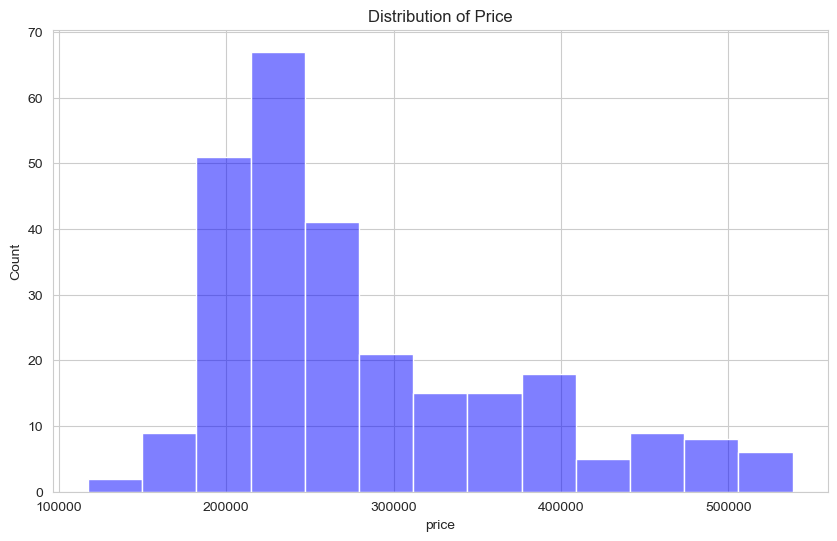

In [1644]:
sns.histplot(data=real_estate, x="price", color='blue', alpha=0.5)
plt.title("Distribution of Price")
plt.show()

In [ ]:
# Average price by building type

In [1645]:
real_estate_sold.groupby("type")["price"].mean()

type
Apartment   270038.54
Office      253213.36
Name: price, dtype: float64

C:\Users\FEYZA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


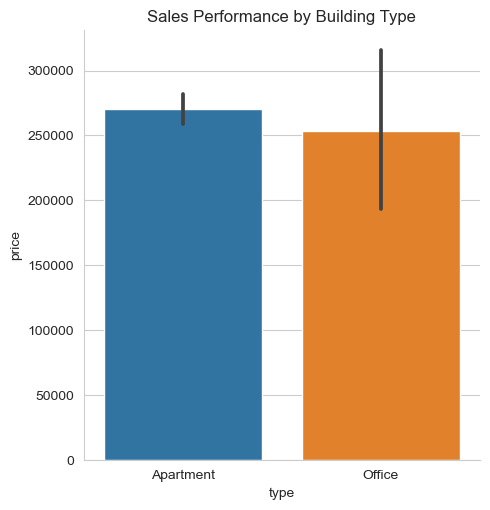

In [1646]:
sns.catplot(data=real_estate_sold,x="type",y="price",kind="bar")
plt.title("Sales Performance by Building Type")
plt.show()

In [1647]:
real_estate["purpose"].value_counts(dropna=False)

purpose
Home          119
Investment     76
NaN            72
Name: count, dtype: int64

In [1648]:
customers["purpose"].value_counts()

purpose
Home          112
Investment     50
Name: count, dtype: int64

In [1034]:
# The crosstab by purpose and country

In [1649]:
pd.crosstab(real_estate["purpose"],real_estate["country"])

country,Belgium,Canada,Denmark,Germany,Mexico,Russia,UK,USA
purpose,,,,,,,,
Home,1,0,0,0,1,2,0,115
Investment,1,7,1,1,0,2,2,62


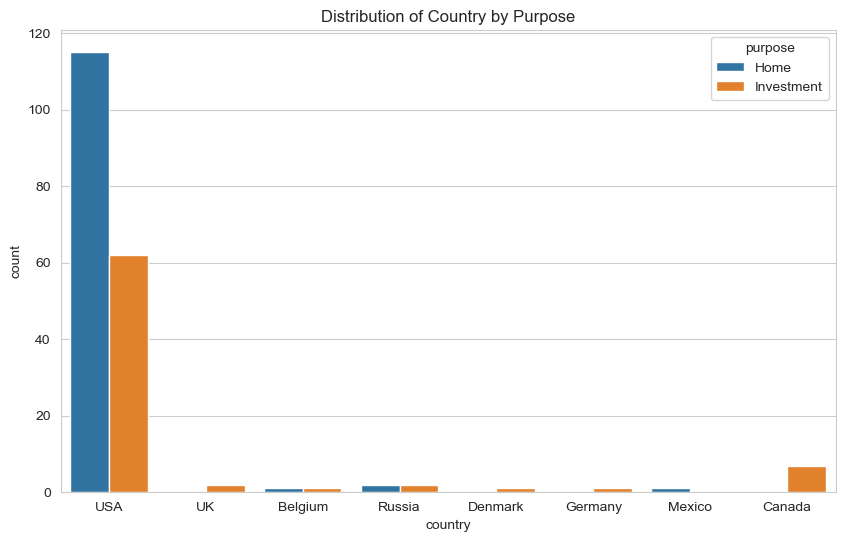

In [1650]:
sns.countplot(x="country",data=real_estate,hue="purpose")
plt.title("Distribution of Country by Purpose")
plt.show()

In [ ]:
# The crosstab by state and purpose

In [1652]:
pd.crosstab(real_estate["state"],real_estate["purpose"])

purpose,Home,Investment
state,,
Arizona,8,3
California,80,40
Colorado,9,2
Kansas,1,0
Nevada,11,6
Oregon,1,10
Utah,3,2
Virginia,1,3
Wyoming,1,0


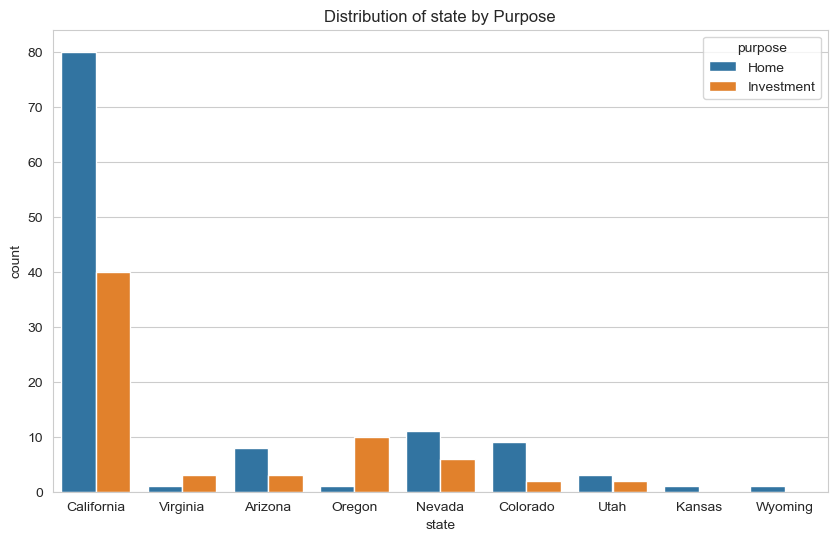

In [1653]:
sns.countplot(x="state",data=real_estate,hue="purpose")
plt.title("Distribution of state by Purpose")
plt.show()

In [ ]:
# Sales Performance by Country

C:\Users\FEYZA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


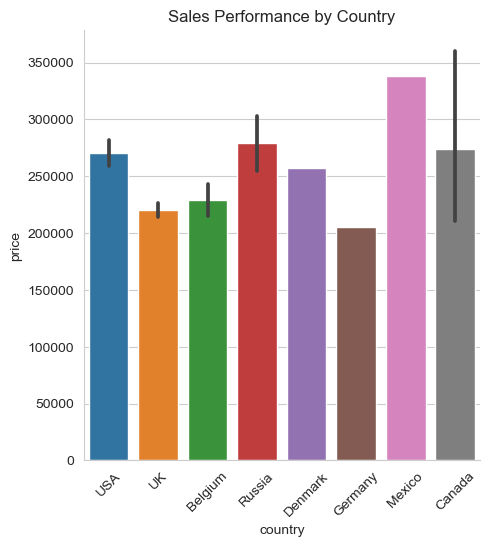

In [1654]:
sns.catplot(data=real_estate,x="country",y="price",kind="bar")
plt.xticks(rotation=45)
plt.title("Sales Performance by Country")
plt.show()

C:\Users\FEYZA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


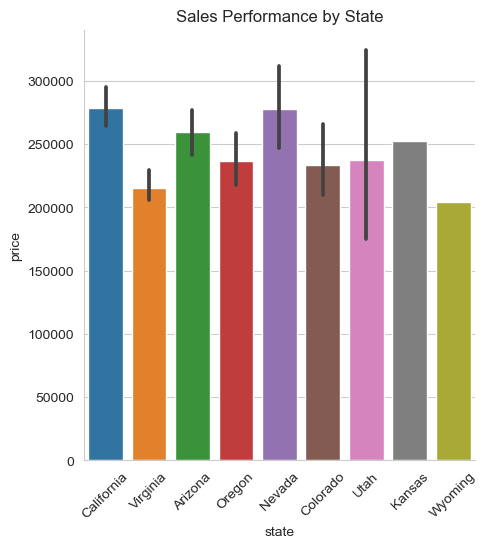

In [1346]:
sns.catplot(data=real_estate,x="state",y="price",kind="bar")
plt.xticks(rotation=45)
plt.title("Sales Performance by State")
plt.show()

In [1655]:
pd.crosstab(real_estate["type"], real_estate["building"],
            values=real_estate["price"], aggfunc="mean")

building,1,2,3,4,5
type,,,,,
Apartment,279935.62,286661.85,280451.26,290239.52,274557.60
Office,248785.15,NaN,NaN,NaN,NaN


In [ ]:
## Outlier Analyzis

In [1656]:
def check_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    up_lmt = Q3 + 1.5 * IQR
    low_lmt = Q1 - 1.5 * IQR
    outlier_value = 0
    for i in df[col]:
        if (i < low_lmt) | (i > up_lmt):
            outlier_value += 1
    return outlier_value


In [1657]:

for col in properties.columns:
    if properties[col].dtype != 'object':
        print(f"{col} : {check_outliers(properties,col)}")
    

id : 0
building : 0
date_sale : 4
property : 0
area : 26
price : 11
sold : 0
customerid : 0
area_m2 : 26


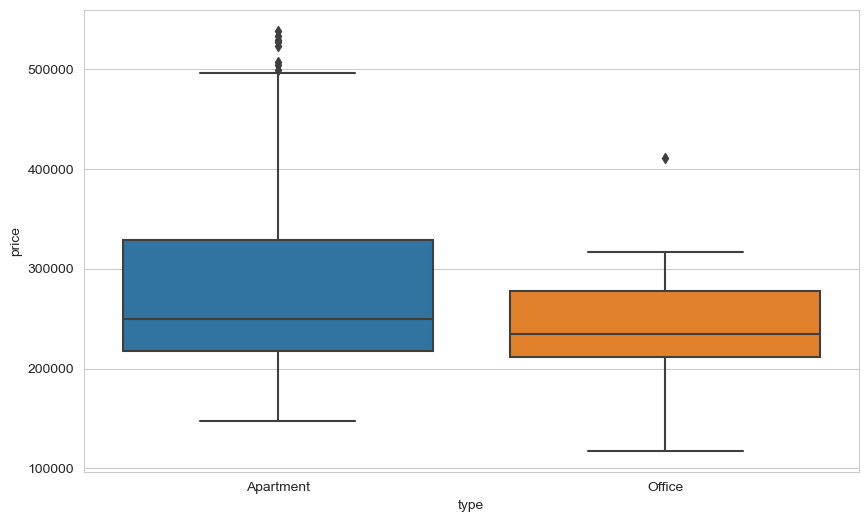

In [1658]:
sns.boxplot(x="type",y="price",data=real_estate)
plt.show()

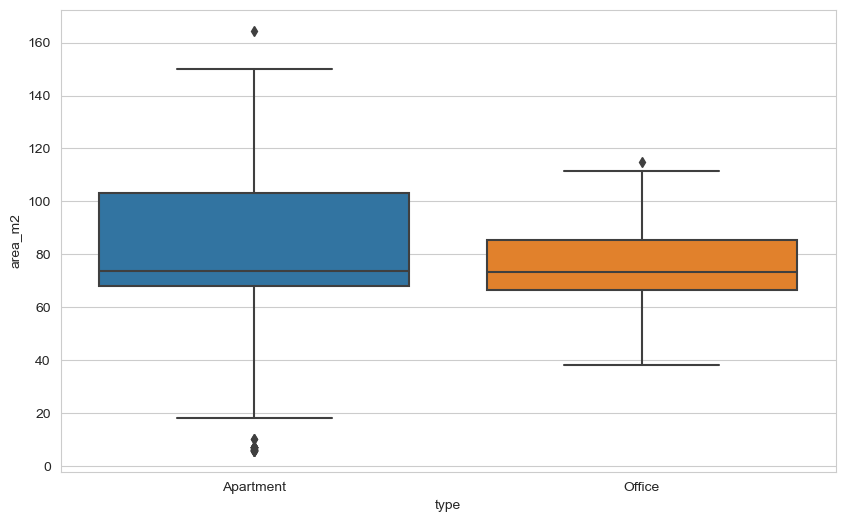

In [1659]:
sns.boxplot(x="type",y="area_m2",data=real_estate)
plt.show()

### Breakdown by Building

First, we focus on the buildings’ variable and their different types. Here you must examine the totals and averages breakdown by building.<br><br><br>
1. Start by examining how many <code>building</code> types there are in the data set.<br><br>
2. Select columns of interest which to examine the totals by building type.<br>
Make a list with those variables, including <code>building</code> as the index variable.<br>
They are <code>sold</code>  and <code>mortgage</code>.<br><br>
3. Find the total number of sold properties, and how many of them had mortgages per building type.<br><br>
4. Select columns of interest to examine the averages by building type and consider that they may not be the exact columns you used for the totals.<br>They are <code>area</code>, <code>price</code>, and <code>deal satisfaction</code>.<br><br>
5. Determine the average values of <code>area</code> , <code>price</code> , and <code>deal satisfaction</code>  per <code>building</code> type.

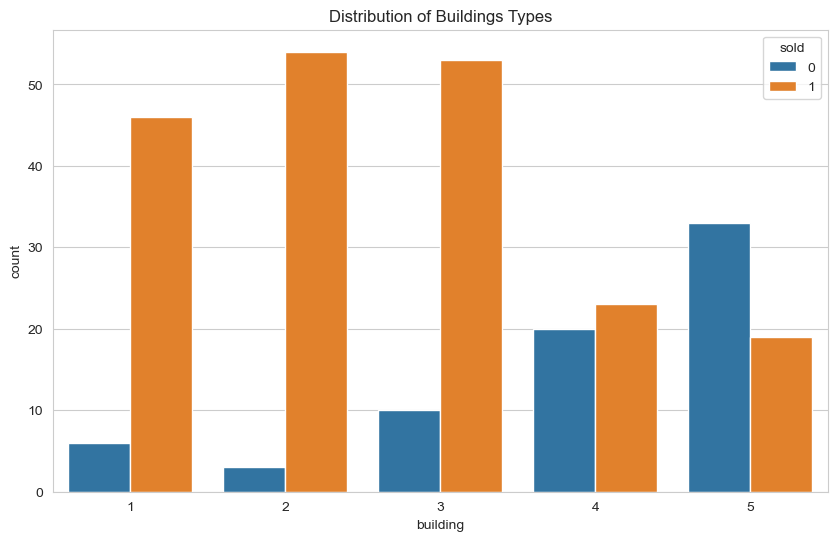

In [1660]:
sns.countplot(x="building",data=real_estate,hue="sold")
plt.title("Distribution of Buildings Types")
plt.show()

In [1661]:
real_estate["type"].value_counts(dropna=False)

type
Apartment    259
Office         8
Name: count, dtype: int64

In [1662]:
building_type=real_estate[["building","sold","mortgage","country"]]
building_type

,building,sold,mortgage,country
0,1,1,0,USA
1,1,1,0,USA
2,2,1,1,USA
3,2,1,1,USA
4,1,1,0,USA
...,...,...,...,...
262,5,0,NaN,NaN
263,5,0,NaN,NaN
264,5,0,NaN,NaN
265,5,0,NaN,NaN


In [624]:
# Sum of Sold and Mortgage by building

In [1663]:
building_type=real_estate.groupby("building").agg(
                sum_of_sold=("sold","count"),
                sum_of_mortgage=("mortgage","count"))
building_type.reset_index()

,building,sum_of_sold,sum_of_mortgage
0,1,52,46
1,2,57,54
2,3,63,53
3,4,43,23
4,5,52,19


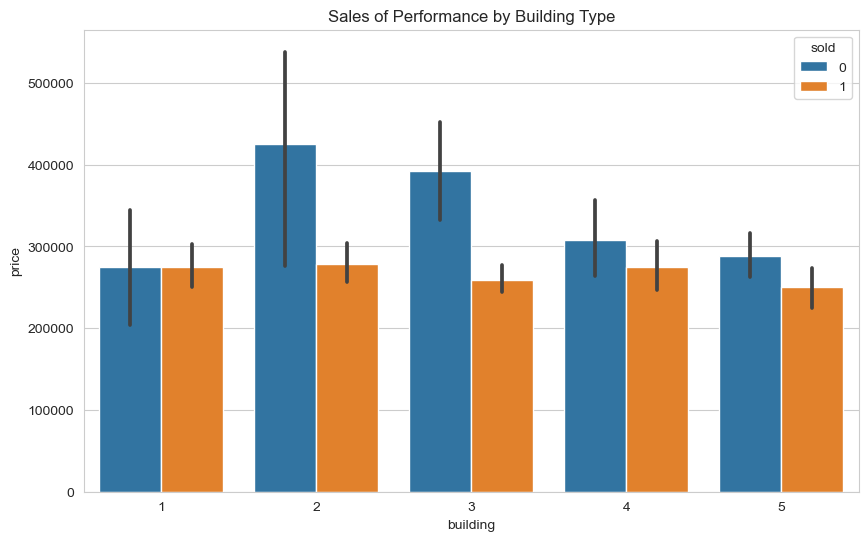

In [1356]:
sns.barplot(x="building",y="price",data=real_estate,hue="sold")
plt.title("Sales of Performance by Building Type")
plt.show()

In [ ]:
# Descriptive statistics by building type

In [1664]:
building_type_avg=real_estate.groupby("building")[["area_feet2","area_m2","price"]].agg(["mean","std"])
building_type_avg.reset_index()

building area_feet2        area_m2           price         
                 mean    std    mean   std      mean      std
0        1     837.27 377.84   77.78 35.10 275143.24 93237.84
1        2     868.99 421.06   80.73 39.12 286661.85 96503.32
2        3     891.14 327.18   82.79 30.40 280451.26 85792.97
3        4     974.72 291.97   90.55 27.13 290239.52 94619.61
4        5     771.00 411.45   71.63 38.22 274557.60 77450.99

### Breakdown by Country

On the country level, perform the same analysis you did for the building types by choosing columns of interest and using summary statistics for the totals and averages.<br> Make note that the breakdown of calculations by <code>country</code>  will give you the frequency distribution by country.

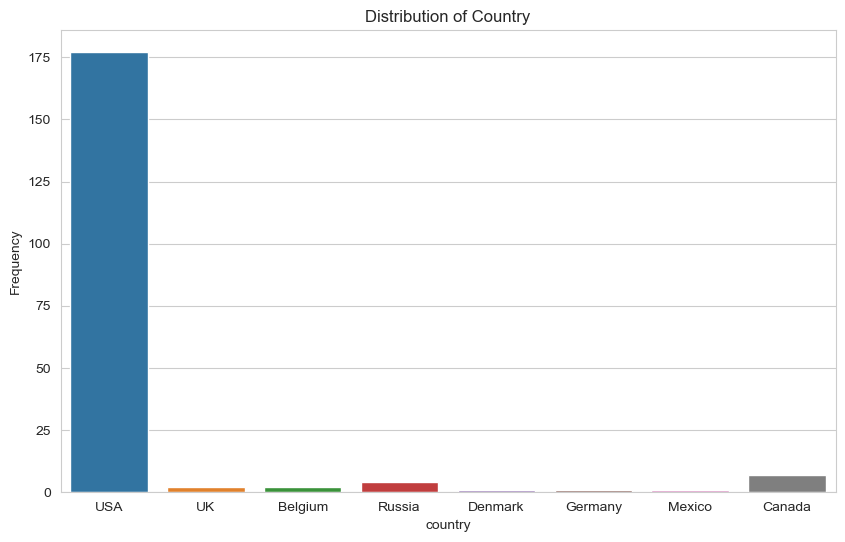

In [1665]:
sns.countplot(x="country",data=real_estate)
plt.title("Distribution of Country")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Sum of sold and sum of mortgage by country

In [1666]:
country_count=real_estate.groupby("country").agg(
                sum_of_sold=("sold","count"),
                sum_of_mortgage=("mortgage","count"))
country_count.reset_index()

,country,sum_of_sold,sum_of_mortgage
0,Belgium,2,2
1,Canada,7,7
2,Denmark,1,1
3,Germany,1,1
4,Mexico,1,1
5,Russia,4,4
6,UK,2,2
7,USA,177,177


In [ ]:
# Descriptive statistics by country

In [1667]:
country_avg=real_estate.groupby("country")[["area_feet2","area_m2","price","deal_satisfaction"]].agg(["mean","std"])
country_avg.reset_index()

country area_feet2        area_m2           price            \
                 mean    std    mean   std      mean       std   
0  Belgium     852.73  99.67   79.22  9.26 229075.47  19325.50   
1   Canada     833.84 468.76   77.47 43.55 274069.38 109124.77   
2  Denmark     785.48    NaN   72.97   NaN 257183.48       NaN   
3  Germany     743.41    NaN   69.07   NaN 205098.21       NaN   
4   Mexico    1283.45    NaN  119.24   NaN 338181.18       NaN   
5   Russia     903.76  84.42   83.96  7.85 278828.84  30065.62   
6       UK     739.48  58.82   68.70  5.46 220142.68   8768.29   
7      USA     834.69 340.57   77.54 31.64 270096.27  80949.11   

  deal_satisfaction       
               mean  std  
0              3.00 1.41  
1              5.00 0.00  
2              1.00  NaN  
3              5.00  NaN  
4              3.00  NaN  
5              2.50 1.00  
6              4.00 0.00  
7              3.58 1.34

### Breakdown by State

Determine the frequency distribution by state, like you did for the countries table.<br>
In addition, create a table containing the relative frequency and the cumulative frequency by state.<br><br><br>
**NOTE:** You can calculate the cumulative frequency using the <code>.cumsum()</code>  pandas method. 

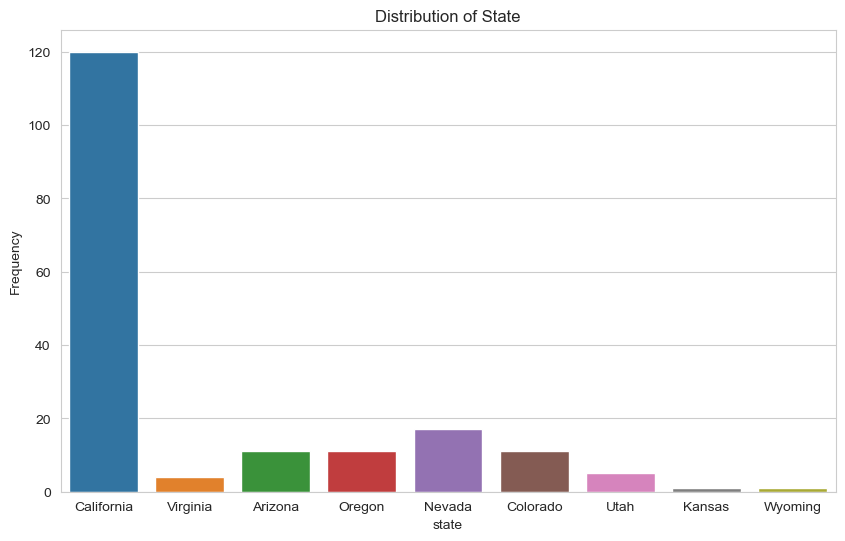

In [1668]:
sns.countplot(x="state",data=real_estate)
plt.title("Distribution of State")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Sum of sold and sum of mortgage by state

In [1669]:
state_count=real_estate.groupby("state").agg(
                sum_of_sold=("sold","count"),
                sum_of_mortgage=("mortgage","count"))
state_count.reset_index()

,state,sum_of_sold,sum_of_mortgage
0,Arizona,11,11
1,California,120,120
2,Colorado,11,11
3,Kansas,1,1
4,Nevada,17,17
5,Oregon,11,11
6,Utah,5,5
7,Virginia,4,4
8,Wyoming,1,1


## Data Analysis

Now that you’ve successfully merged the two datasets and have tackled descriptive statistics,<br> thus successfully completing an vital part of the project, it’s time to focus on the analysis of key variables.<br><br><br>
This phase will include a more in-depth analysis of the data to uncover trends, correlations, and hidden insights.<br><br> Start by analyzing the customers' age (and age intervals) and perform the same analysis for the properties’ prices.<br><br> Ultimately, find out more about the relationship between age and price.

### Analyzing Age

1. **Calculate age at the time of purchase.**<br>
The first step of the analysis is determining the age of customers at the time of sale.<br>As there isn’t such a variable in the data, you must work out the customers’ ages from the information given in the data.<br><br>
2. **Create age interval categories.**<br>
After calculating the customers' ages, you must create age intervals to evaluate group behavior.<br>
Separate the age into 10 intervals of equal length, or otherwise create the following intervals:<br><br>
(19.0, 25.0], (25.0, 31.0], (31.0, 36.0], (36.0, 42.0], (42.0, 48.0], (48.0, 54.0], (54.0, 59.0], (59.0, 65.0], (65.0, 71.0], (71.0, 76.0]<br><br>
3. **Break down by age intervals.**<br>
Finally, using summary statistics, determine how many properties have been sold by age intervals.

In [ ]:
# To calculate the age using the "date_sale" and "birth_date" columns and calculate age interval

In [1670]:
real_estate["age"]=(real_estate["date_sale"].dt.year)-(real_estate["birth_date"].dt.year)
age=real_estate["age"]

In [1671]:
max_value=real_estate["age"].max()
min_value=real_estate["age"].min()
print(max_value,min_value)


76.0 19.0


In [1672]:
interval=(max_value-min_value)/5
interval

11.4

In [1673]:
age_ranges=[18,36,44,55,65,76]

In [1674]:
age_labels=["Young","Young_adult","Middle_age","Upper_middle_age","Old"]

In [1675]:
real_estate["age_level"] = pd.cut(real_estate["age"],
                                  bins=age_ranges,
                                  labels=age_labels)

In [1676]:
real_estate["age"].describe()

count   178.00
mean     45.97
std      12.92
min      19.00
25%      36.25
50%      44.00
75%      55.00
max      76.00
Name: age, dtype: float64

In [1677]:
real_estate

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area_feet2,price,sold,area_m2,age,age_level
0,28,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.00,0,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,69.04,19.00,Young
1,27,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.00,0,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,70.25,22.00,Young
2,112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.00,1,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,54.56,22.00,Young
3,160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.00,1,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,149.09,22.00,Young
4,14,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.00,0,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,127.78,25.00,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,NaT,Apartment,44,1238.58,322610.74,0,115.07,NaN,NaN
263,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,NaT,Apartment,47,794.52,279191.26,0,73.81,NaN,NaN
264,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,NaT,Apartment,48,1013.27,287996.53,0,94.14,NaN,NaN
265,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,NaT,Apartment,50,1074.71,365868.78,0,99.84,NaN,NaN


In [1678]:
real_estate.to_csv('real_estate.csv', index=False)

In [ ]:
# To calculate the number of properties sold based on age level.

In [1679]:
total_property=real_estate.groupby("age_level")["property"].count()
total_property.reset_index()

,age_level,property
0,Young,45
1,Young_adult,45
2,Middle_age,44
3,Upper_middle_age,26
4,Old,18


<Axes: >

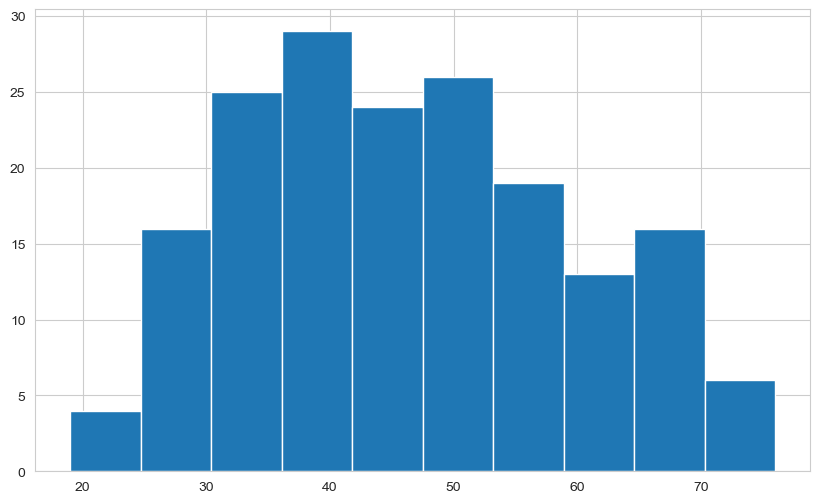

In [1680]:
real_estate["age"].hist()

In [1681]:
def calculation_skewness(df,col):
    skew=df[col].skew()
    if -1<skew<1:
        print(f"Skewness coefficient is {skew} and The Distribution is Normal")
    elif (-1<skew<-0.5)|(0.5<skew<1):
        print(f"Skewness coefficient is {skew} and The Distribution is Moderately Skewed")
        

In [1682]:
calculation_skewness(real_estate,"age")

Skewness coefficient is 0.26305650882910137 and The Distribution is Normal


### Analyzing Properties

To analyze the properties, you must perform similar steps to the age analysis.<br><br>
- Create **10** bins for the price intervals to answer the quiz questions successfully.<br><br>
- But remember that the correct number of bins may vary in real-world situations.

In [ ]:
# To calculate the number of properties sold based on price level.

In [1683]:
max_price=real_estate["price"].max()
min_price=real_estate["price"].min()
print(max_price,min_price)

538271.74 117564.07


In [1684]:
interval=(max_price-min_price)/5
interval

84141.534

In [1379]:
#price_ranges=[117562,159633,201704,243775,285846,327917,369988,412059,454130,496201,538272]

In [1380]:
#price_labels=["0-159K","159K-201K","201K-243K","243K-285K","285K-327K",\
              #"327K-369K","369K-412K","412K-454K","454K-496K","496K-538K"]

In [1381]:
#real_estate["price_level"] = pd.cut(real_estate["price"],
                                  #bins=price_ranges,
                                  #labels=price_labels)

In [1685]:
price_ranges=[117563,201705,285847,369989,454131,538273]

In [1686]:
price_ranges=[100000,202000,285000,370000,455000,590000]

In [1687]:
price_labels=["Low","Lower_middle","Middle","Upper_middle","High"]
              

In [1688]:
real_estate["price_level"] = pd.cut(real_estate["price"],
                                  bins=price_ranges,
                                  labels=price_labels)

In [1689]:
total_property=real_estate.groupby("price_level")["property"].count()
total_property.reset_index()

,price_level,property
0,Low,35
1,Lower_middle,135
2,Middle,49
3,Upper_middle,28
4,High,20


In [1690]:
pd.crosstab(real_estate["age_level"],real_estate["price_level"],
                values=real_estate["property"], aggfunc="count")

price_level,Low,Lower_middle,Middle,Upper_middle,High
age_level,,,,,
Young,9,19,8,5,4
Young_adult,6,18,12,6,3
Middle_age,9,26,7,1,1
Upper_middle_age,2,17,3,3,1
Old,1,12,4,1,0


In [674]:
#Analysis of the deal satisfaction data

In [1691]:
real_estate["deal_satisfaction"].value_counts(normalize=True)

deal_satisfaction
5.00   0.35
4.00   0.22
3.00   0.21
2.00   0.13
1.00   0.10
Name: proportion, dtype: float64

In [1692]:
real_estate.groupby("country")["deal_satisfaction"].agg(["mean"])

,mean
country,
Belgium,3.00
Canada,5.00
Denmark,1.00
Germany,5.00
Mexico,3.00
Russia,2.50
UK,4.00
USA,3.58


In [1693]:
real_estate["deal_satisfaction"].mean()

3.6

In [1694]:
real_estate.groupby("age_level")["deal_satisfaction"].mean()

age_level
Young              3.47
Young_adult        3.29
Middle_age         3.43
Upper_middle_age   4.12
Old                3.61
Name: deal_satisfaction, dtype: float64

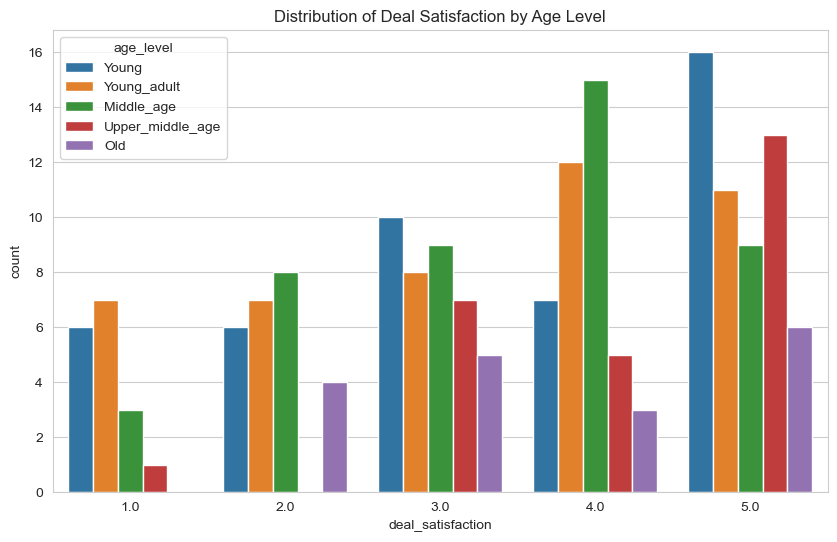

In [1695]:
sns.countplot(data=real_estate,x="deal_satisfaction",hue="age_level")
plt.title("Distribution of Deal Satisfaction by Age Level")
plt.show()

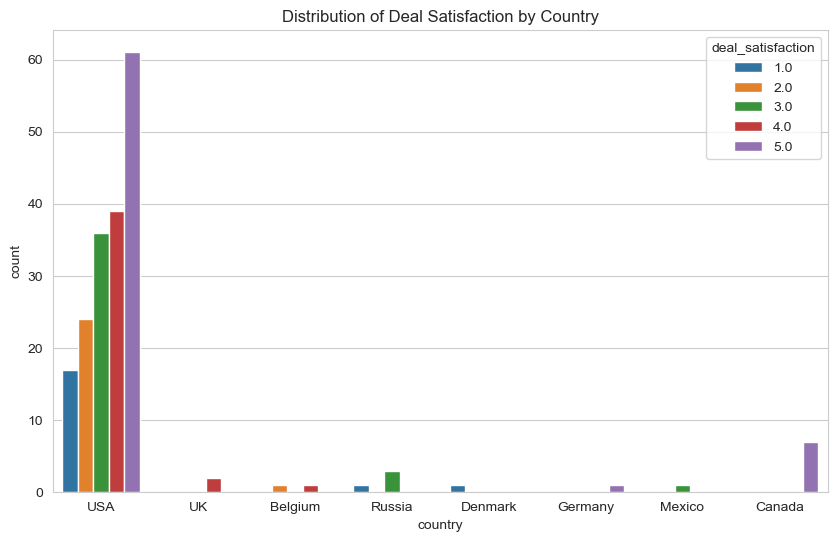

In [1696]:
sns.countplot(data=real_estate,x="country",hue="deal_satisfaction")
plt.title("Distribution of Deal Satisfaction by Country")
plt.show()

In [ ]:
#Analysis of the purpose data

In [1697]:
real_estate["purpose"].value_counts(normalize=True)

purpose
Home         0.61
Investment   0.39
Name: proportion, dtype: float64

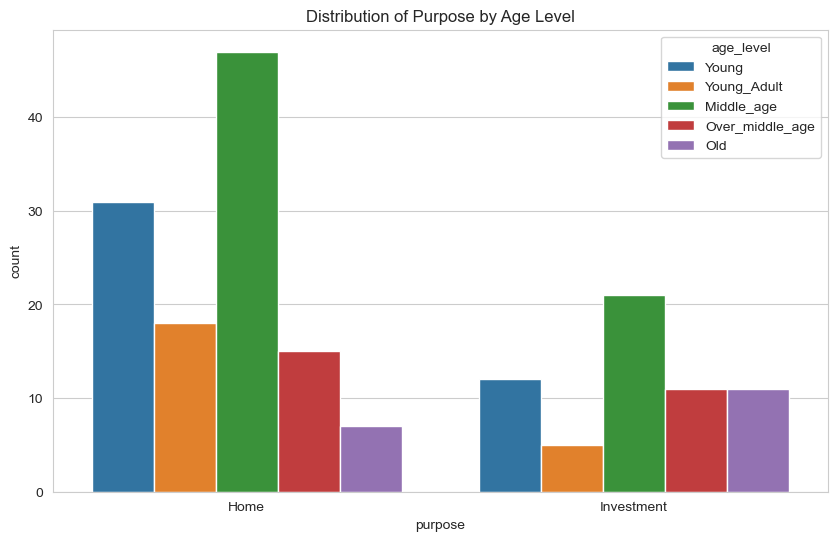

In [1438]:
sns.countplot(data=real_estate,x="purpose",hue="age_level")
plt.title("Distribution of Purpose by Age Level")
plt.show()

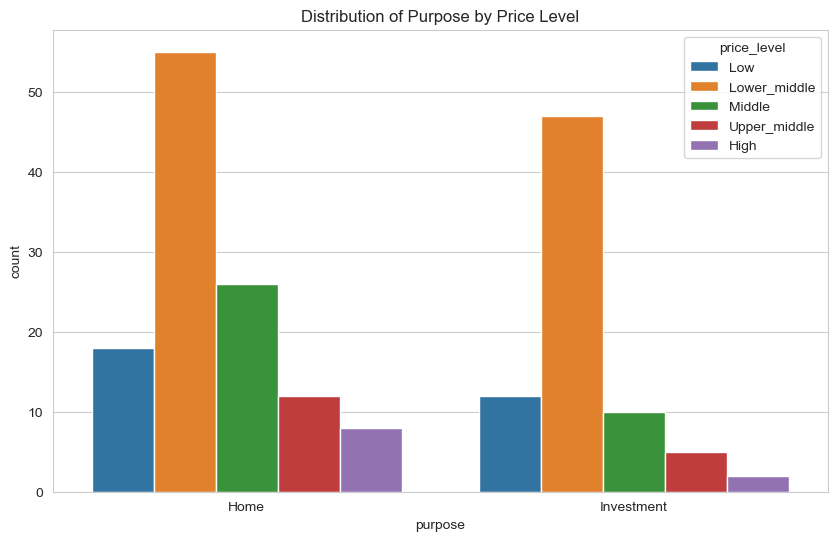

In [1698]:
sns.countplot(data=real_estate,x="purpose",hue="price_level")
plt.title("Distribution of Purpose by Price Level")
plt.show()

In [ ]:
#Analysis of the source data

In [1699]:
real_estate["source"].value_counts(normalize=True)

source
Website   0.61
Agency    0.30
Client    0.09
Name: proportion, dtype: float64

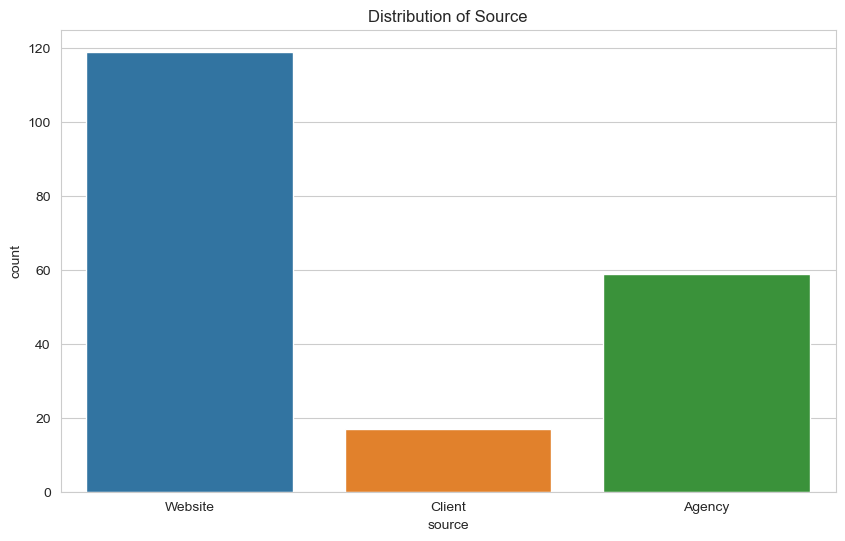

In [1394]:
sns.countplot(data=real_estate,x="source")
plt.title("Distribution of Source")
plt.show()

In [1701]:
pd.crosstab(real_estate["age_level"],real_estate["source"],
           values=real_estate["sold"],aggfunc="count")

source,Agency,Client,Website
age_level,,,
Young,15,9,21
Young_adult,20,2,23
Middle_age,14,4,26
Upper_middle_age,6,1,19
Old,3,1,14


### Relationship between Properties and Age

To conclude this data analysis part of the project, you must examine the relationship between the properties and age variable.<br><br>
Discover the covariance and correlation between the two variables.

In [1702]:
correlation_matrix=real_estate.corr(numeric_only=1)
correlation_matrix

,customerid,deal_satisfaction,id,area_feet2,price,area_m2,age
customerid,1.00,0.15,0.01,-0.08,-0.18,-0.08,0.09
deal_satisfaction,0.15,1.00,0.01,-0.01,0.02,-0.01,0.08
id,0.01,0.01,1.00,-0.01,0.00,-0.01,0.12
area_feet2,-0.08,-0.01,-0.01,1.00,0.77,1.00,-0.05
price,-0.18,0.02,0.00,0.77,1.00,0.77,-0.17
area_m2,-0.08,-0.01,-0.01,1.00,0.77,1.00,-0.05
age,0.09,0.08,0.12,-0.05,-0.17,-0.05,1.00


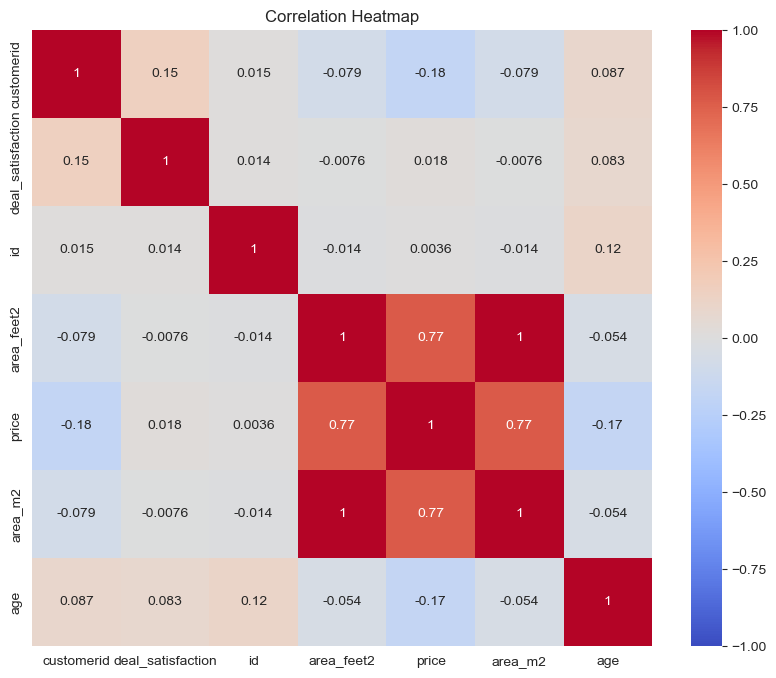

In [1397]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Except for the price and area variable,there is no a significant and important relationship between variables.
# The corelation coefficiant between price and area is 0.77
# There is a positive and strong relationship between price and area
 

## Data Visualization

The final part of the project is all about data visualization.<br>
Here is where all of our hard work pays off!<br><br> 

Ensure you’ve cleaned and preprocessed the data and completed all the descriptive statistics and data analysis tasks because they’ll also serve you well in this part. 
<br>You’re now ready to answer the client’s following critical questions regarding the data.

- What is the average deal satisfaction for each country? How does it look by state?<br><br>
- What is the monthly revenue of the company?<br><br>
- How many apartments are sold in each state?<br><br>
- What is the age distribution for customers? (Use the same age intervals or number of bins from the data analysis stage.)<br><br>
- What are the yearly sales for each building?<br><br><br>
To answer these questions, you can create the following visualizations:

    **- Deal Satisfaction by Country –** A bar chart or a heat map that represents average deal satisfaction by country<br><br>
    **- Revenue Graph –** A time-series graph showing the total revenue over time<br><br>
    **- Apartments Sold by State –** A pareto chart, in which the bar shows the absolute frequency of buildings sold by state, and the line chart displays the cumulative frequency<br><br>
    **- Age Distribution Histogram –** A histogram displaying the age distribution of customers<br><br>
    **- Sales per Year by Building Type –**  A stacked bar graph or a line graph showing the yearly sales for each building type<br><br><br>
Think about the previous analysis you've conducted on the relevant variables, such as the descriptive statistics by state and the deal satisfaction by country.<br> Many of the visualizations can be created based on already existing tables.

In [1703]:
df1=real_estate[["customerid","entity","name","surname","birth_date","sex","age","age_level","price_level","country","state","purpose","deal_satisfaction","mortgage","source"]]
df1

,customerid,entity,name,surname,birth_date,sex,age,age_level,price_level,country,state,purpose,deal_satisfaction,mortgage,source
0,28,Individual,Madalyn,Mercer,1986-06-21,F,19.00,Young,Lower_middle,USA,California,Home,5.00,0,Website
1,27,Individual,Lara,Carrillo,1983-02-24,F,22.00,Young,Lower_middle,USA,California,Home,5.00,0,Website
2,112,Individual,Donavan,Flowers,1985-12-27,M,22.00,Young,Lower_middle,USA,California,Home,1.00,1,Client
3,160,Individual,Darien,Dorsey,1985-12-27,M,22.00,Young,Upper_middle,USA,California,Investment,3.00,1,Website
4,14,Individual,Alessandra,Perry,1979-05-15,F,25.00,Young,High,USA,California,Home,4.00,0,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
263,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Lower_middle,NaN,NaN,NaN,NaN,NaN,NaN
264,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
265,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN


In [1704]:
df2=real_estate[["customerid","id","building","date_sale","type","property","area_feet2","price","sold","area_m2"]]
df2

,customerid,id,building,date_sale,type,property,area_feet2,price,sold,area_m2
0,28,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,69.04
1,27,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,70.25
2,112,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,54.56
3,160,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,149.09
4,14,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,127.78
...,...,...,...,...,...,...,...,...,...,...
262,-1,5044,5,NaT,Apartment,44,1238.58,322610.74,0,115.07
263,-1,5047,5,NaT,Apartment,47,794.52,279191.26,0,73.81
264,-1,5048,5,NaT,Apartment,48,1013.27,287996.53,0,94.14
265,-1,5050,5,NaT,Apartment,50,1074.71,365868.78,0,99.84


In [1705]:
df1.to_csv("df1.csv",index=False)



In [1706]:
df2.to_csv("df2.csv",index=False)

## Data Interpretation

The last step of the project is to think about the data interpretation.

Based on the data analysis, what can you conclude about the customer profile, as well as the building characteristics?

You need to ask questions such as:

-  Which customer age bracket has the most buyers potential?<br><br>
-  What is the most sought after building?<br><br>
-  What is the highest priced building?<br><br>
Once you’ve formulated these questions and other relevant questions, consider how to leverage into a real-estate development strategy.

## Quiz

**Question 1:**<br><br>
Which method is commonly used to combine two datasets into one Python?<br><br>
-  .merge()<br><br>
-  .concatenate() <br><br>
-  .join()<br><br>
-  .combine()

**Question 2:**<br><br>
What is the average area of building type 1 in the data set in squared feet?<br><br>
-  267<br><br>
-  284 <br><br>
-  928<br><br>
-  1943

In [1398]:
avg_type_mean=real_estate.groupby("type")["area_feet2"].agg(["mean"])
avg_type_mean

,mean
type,
Apartment,866.92
Office,835.67


**Question 3:**<br><br>
What is the most common property type sold?<br><br>
-  Apartment<br><br>
-  Detached House <br><br>
-  Townhouse<br><br>
-  Office

In [1399]:
real_estate_sold["type"].value_counts()

type
Apartment    188
Office         7
Name: count, dtype: int64

**Question 4:**<br><br>
Which building has the highest average property price?<br><br>
-  Building 1<br><br>
-  Building 2 <br><br>
-  Building 3<br><br>
-  Building 4

In [1400]:
real_estate.groupby("building")["price"].agg(["mean"])

,mean
building,
1,275143.24
2,286661.85
3,280451.26
4,290239.52
5,274557.60


**Question 5:**<br><br>
What is the average cost of a building in Mexico?<br><br>
-  $205,098<br><br>

-  $257,183<br><br>

-  $270,096<br><br>

-  $338,181<br>

In [1401]:
real_estate.groupby("country")["price"].mean()

country
Belgium   229075.47
Canada    274069.38
Denmark   257183.48
Germany   205098.21
Mexico    338181.18
Russia    278828.84
UK        220142.68
USA       270096.27
Name: price, dtype: float64

In [1402]:
real_estate["state"].value_counts(dropna=False)

state
California    120
NaN            72
Nevada         17
None           14
Arizona        11
Oregon         11
Colorado       11
Utah            5
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

**Question 6:**<br><br>
Based on the data, which state has the second-highest number of properties sold?<br><br>
-  California<br><br>
-  Colorado <br><br>
-  Nevada<br><br>
-  Oregon

In [1403]:
real_estate.groupby("state")["price"].mean()

state
Arizona      259526.95
California   278680.74
Colorado     233662.46
Kansas       252185.99
Nevada       277649.33
Oregon       236593.32
Utah         237755.28
Virginia     215144.19
Wyoming      204286.67
Name: price, dtype: float64

**Question 7:**<br><br>
Based on the customer demographics, what is the most common age range of property buyers?<br><br>
- 31-36<br><br>
-  36-42 <br><br>
-  42-48<br><br>
-  48-54

In [162]:
##age_ranges=[19,25,31,36,42,48,54,59,65,71,76]

In [163]:
##age_labels=["19-25","25-31","31-36","36-42","42-48","48-54","54-59","59-65","65-71","71-76"]

In [164]:
##real_estate["age_level"] = pd.cut(real_estate["age"],
                                  #bins=age_ranges,
                                  #labels=age_labels)

IndentationError: unexpected indent (3858940807.py, line 2)

In [ ]:
##real_estate.groupby("age_level")["property"].count()

**Question 8:**<br><br>
Considering you have split the price variable into **10** equal intervals, how many **unsold** properties are there in the last interval 
(496,201–538,272 USD)?:<br><br>
- 31-36<br><br>
-  36-42 <br><br>
-  42-48<br><br>
-  48-54

In [1404]:
property_unsold=real_estate[real_estate["sold"]==0].groupby("price_level")["sold"].count()
property_unsold.reset_index()

,price_level,sold
0,0-159K,1
1,159K-201K,4
2,201K-243K,20
3,243K-285K,13
4,285K-327K,7
5,327K-369K,6
6,369K-412K,8
7,412K-454K,3
8,454K-496K,4
9,496K-538K,6


**Question 9:**<br><br>
What is the correlation between the customer's age and the property price?<br><br>
-  Positive correlation<br><br>
-  Negative correlation <br><br>
-  No correlation<br><br>
-  Immeasurable from the data

In [1405]:
real_estate[["age","price"]].corr()

,age,price
age,1.00,-0.17
price,-0.17,1.00


**Question 10:**<br><br>
Which of the following countries has the highest average deal satisfaction?<br><br>
-  Belgium<br><br>
-  Canada <br><br>
-  Mexico<br><br>
-  USA

In [1406]:
real_estate.groupby("country")["deal_satisfaction"].mean()

country
Belgium   3.00
Canada    5.00
Denmark   1.00
Germany   5.00
Mexico    3.00
Russia    2.50
UK        4.00
USA       3.58
Name: deal_satisfaction, dtype: float64

**Question 11:**<br><br>
Looking at the histogram of age distribution, what can you infer about the shape of the distribution?<br><br>
-  Positively skewed<br><br>
-  Negatively skewed <br><br>
-  Normal distribution<br><br>
-  Bimodal distribution


**Question 12:**<br><br>
Which building had the highest sales in 2004 according to the data?<br><br>
-  Building 1<br><br>
-  Building 2 <br><br>
-  Building 3<br><br>
-  Building 4


In [1407]:
real_estate["year"]=real_estate["date_sale"].dt.year
real_estate["year"]

0     2005.00
1     2005.00
2     2007.00
3     2007.00
4     2004.00
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year, Length: 267, dtype: float64

In [1408]:
pd.crosstab(real_estate["year"],real_estate["building"])

building,1,2,3,4,5
year,,,,,
2004.00,15,1,0,0,0
2005.00,24,3,0,0,0
2006.00,6,23,8,2,1
2007.00,1,27,43,20,11
2008.00,0,0,2,1,6
2010.00,0,0,0,0,1


**Question 13:**<br><br>
Which of the following states account for 82% of the company revenue?<br><br>
-  California, Nevada, Colorado<br><br>
-  California, Nevada, Oregon <br><br>
-  Nevada, Colorado<br><br>
-  Utah, Nevada, Colorado


In [1409]:
real_estate_sum=real_estate.groupby("state")["price"].sum()
real_estate_relative=real_estate_sum/real_estate_sold["price"].sum()
real_estate_relative

state
Arizona      0.05
California   0.64
Colorado     0.05
Kansas       0.00
Nevada       0.09
Oregon       0.05
Utah         0.02
Virginia     0.02
Wyoming      0.00
Name: price, dtype: float64

**Question 14:**<br><br>
Which of the following years brought in the highest revenue?<br><br>
-  2004<br><br>
-  2007 <br><br>
-  2008<br><br>
-  2009


In [1410]:
real_estate[real_estate["sold"]==1].groupby("year")["price"].sum()

year
2004.00    4397009.80
2005.00    7215232.41
2006.00   10906000.58
2007.00   27451798.34
2008.00    2212160.05
2010.00     357538.20
Name: price, dtype: float64

**Question 15:**<br><br>
Referring to the stacked area chart showing the total number of sales per year by building, which building showed a significant decrease in sales over the years?<br><br>
-  Building 1<br><br>
-  Building 2 <br><br>
-  Building 3<br><br>
-  Building 4


In [1415]:
real_estate["total_sales_by_year"] = real_estate.groupby("year")["sold"].transform(lambda x: x.count())


In [1416]:
total_sales_by_year=real_estate.groupby("year")["sold"].count()
total_sales_by_year

year
2004.00     16
2005.00     27
2006.00     40
2007.00    102
2008.00      9
2010.00      1
Name: sold, dtype: int64

C:\Users\FEYZA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


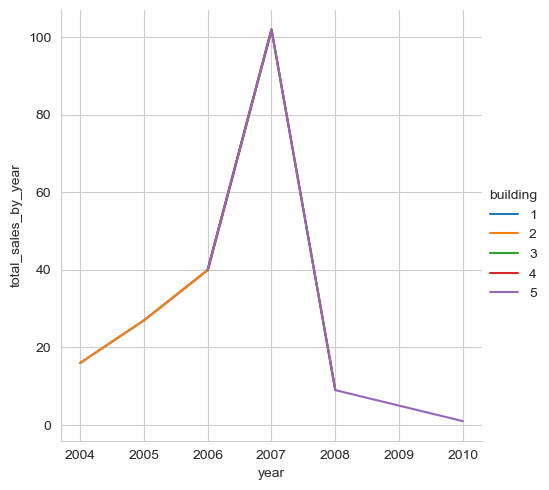

In [1417]:
sns.relplot(data=real_estate,x="year",y="total_sales_by_year",hue="building",kind="line")
plt.show()

## SQL Connection with Python

### SQLite3

In [137]:
import sqlite3

# Connect to the in-memory database
conn = sqlite3.connect(':memory:')

# Create a cursor from the connection
cursor = conn.cursor()

# Execute a query to create a table
cursor.execute("CREATE TABLE your_table (id INTEGER PRIMARY KEY, name TEXT, value REAL)")

# Execute a query to insert some data
cursor.execute("INSERT INTO your_table (id, name, value) VALUES (1, 'first', 1.1), (2, 'second', 2.2), (3, 'third', 3.3)")

# Execute a query to select data
cursor.execute("SELECT * FROM your_table")

# Fetch the results of the query
rows = cursor.fetchall()

# Loop through the results and print each row
for row in rows:
    print(row)

(1, 'first', 1.1)
(2, 'second', 2.2)
(3, 'third', 3.3)


In [138]:
# Commit the changes and close the cursor and the connection
conn.commit()
cursor.close()
conn.close()

### MSSQL Server

In [139]:
!pip install pypyodbc

In [140]:
#!pip install pypyodbc
import pypyodbc 


**Connection with Windows Authentication**

In [141]:
conn = pypyodbc.connect(
  "Driver={SQL Server};"
  "Server={DESKTOP-REJUTDN\SQLEXPRESS};"
  "Database={Real_Estate};"
  "{Trusted_Connection=True};"
)

In [142]:
cursor = conn.cursor()

In [143]:
cursor.execute("SELECT * FROM dbo.customers_clean")

In [144]:
customers_clean = cursor.fetchall()

In [145]:
customers_clean

[('110',
  'Individual',
  'Kareem',
  'Liu',
  '1968-05-11',
  'F',
  'USA',
  'California',
  'Home',
  4,
  True,
  'Website'),
 ('10',
  'Individual',
  'Trystan',
  'Oconnor',
  '1962-11-26',
  'M',
  'USA',
  'California',
  'Home',
  1,
  False,
  'Website'),
 ('132',
  'Individual',
  'Kale',
  'Gay',
  '1959-04-07',
  'M',
  'USA',
  'California',
  'Home',
  4,
  True,
  'Agency'),
 ('137',
  'Individual',
  'Russell',
  'Gross',
  '1959-11-25',
  'M',
  'USA',
  'California',
  'Home',
  5,
  False,
  'Website'),
 ('174',
  'Company',
  'Marleez',
  'Co',
  None,
  None,
  'USA ',
  'California',
  'Investment',
  5,
  False,
  'Website'),
 ('88',
  'Individual',
  'Yurem',
  'Wright',
  '1957-03-06',
  'M',
  'USA',
  'California',
  'Home',
  3,
  True,
  'Website'),
 ('79',
  'Individual',
  'Xavier',
  'Faulkner',
  '1947-05-24',
  'M',
  'Canada',
  None,
  'Investment',
  5,
  False,
  'Website'),
 ('149',
  'Individual',
  'Kayden',
  'Olsen',
  '1969-10-17',
  'F',
 

limit_output extension: Maximum message size of 10000 exceeded with 21597 characters

In [146]:
for i in customers_clean:
    print(i)

('110', 'Individual', 'Kareem', 'Liu', '1968-05-11', 'F', 'USA', 'California', 'Home', 4, True, 'Website')
('10', 'Individual', 'Trystan', 'Oconnor', '1962-11-26', 'M', 'USA', 'California', 'Home', 1, False, 'Website')
('132', 'Individual', 'Kale', 'Gay', '1959-04-07', 'M', 'USA', 'California', 'Home', 4, True, 'Agency')
('137', 'Individual', 'Russell', 'Gross', '1959-11-25', 'M', 'USA', 'California', 'Home', 5, False, 'Website')
('174', 'Company', 'Marleez', 'Co', None, None, 'USA ', 'California', 'Investment', 5, False, 'Website')
('88', 'Individual', 'Yurem', 'Wright', '1957-03-06', 'M', 'USA', 'California', 'Home', 3, True, 'Website')
('79', 'Individual', 'Xavier', 'Faulkner', '1947-05-24', 'M', 'Canada', None, 'Investment', 5, False, 'Website')
('149', 'Individual', 'Kayden', 'Olsen', '1969-10-17', 'F', 'USA', 'California', 'Home', 5, False, 'Website')
('64', 'Individual', 'Joaquin', 'Mullins', '1975-10-05', 'M', 'USA', 'California', 'Investment', 5, False, 'Agency')
('68', 'Indiv

limit_output extension: Maximum message size of 10000 exceeded with 17710 characters

In [147]:
cursor.description 

[('customerid', str, 50, 50, 50, 0, False),
 ('entity', str, 50, 50, 50, 0, False),
 ('name', str, 50, 50, 50, 0, False),
 ('surname', str, 50, 50, 50, 0, False),
 ('birth_date', str, 10, 10, 10, 0, True),
 ('sex', str, 50, 50, 50, 0, True),
 ('country', str, 50, 50, 50, 0, False),
 ('state', str, 50, 50, 50, 0, True),
 ('purpose', str, 50, 50, 50, 0, False),
 ('deal_satisfaction', int, 3, 3, 3, 0, False),
 ('mortgage', bool, 1, 1, 1, 0, False),
 ('source', str, 50, 50, 50, 0, False)]

In [148]:
[i[0] for i in cursor.description]

['customerid',
 'entity',
 'name',
 'surname',
 'birth_date',
 'sex',
 'country',
 'state',
 'purpose',
 'deal_satisfaction',
 'mortgage',
 'source']

In [149]:
col_names = [i[0] for i in cursor.description]
col_names 

['customerid',
 'entity',
 'name',
 'surname',
 'birth_date',
 'sex',
 'country',
 'state',
 'purpose',
 'deal_satisfaction',
 'mortgage',
 'source']

In [150]:
import pandas as pd 
import numpy as np

In [151]:
customers_clean= pd.DataFrame(customers_clean, columns=col_names)
customers_clean

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,None,None,USA,California,Investment,5,False,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,True,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,False,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,False,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,False,Website


## Shortcut :)

In [156]:
import pandas as pd 
import numpy as np

In [157]:
conn = pypyodbc.connect(
  "Driver={SQL Server};"
  "Server={DESKTOP-REJUTDN\SQLEXPRESS};"
  "Database={Real_Estate};"
  "{Trusted_Connection=True};"
)

In [158]:
customers_clean=pd.read_sql_query("SELECT * FROM dbo.customers_clean",conn)
customers_clean

C:\Users\FEYZA\AppData\Local\Temp\ipykernel_7568\315017730.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_clean=pd.read_sql_query("SELECT * FROM dbo.customers_clean",conn)


,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,True,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,False,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,True,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,False,Website
4,174,Company,Marleez,Co,None,None,USA,California,Investment,5,False,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,True,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,False,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,False,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,False,Website


In [159]:
properties_clean=pd.read_sql_query("SELECT * FROM dbo.properties_clean",conn)
properties_clean

C:\Users\FEYZA\AppData\Local\Temp\ipykernel_7568\3500395327.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  properties_clean=pd.read_sql_query("SELECT * FROM dbo.properties_clean",conn)


,id,building,date_sale,type,property,area,price,status,customerid,area_m2
0,1030,1,11/1/2005,Apartment,30,743.09,24617268.00,Sold,28,69.04
1,1029,1,10/1/2005,Apartment,29,756.21,24633190.00,Sold,27,70.25
2,2002,2,7/1/2007,Apartment,2,587.28,20928091.00,Sold,112,54.56
3,2031,2,12/1/2007,Apartment,31,1604.75,45266701.00,Sold,160,149.09
4,1049,1,11/1/2004,Apartment,49,1375.45,46708331.00,Sold,14,127.78
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,32261074.00,-,None,115.07
263,5047,5,#NUM!,Apartment,47,794.52,27919126.00,-,None,73.81
264,5048,5,#NUM!,Apartment,48,1013.27,28799653.00,-,None,94.14
265,5050,5,#NUM!,Apartment,50,1074.71,36586878.00,-,None,99.84


**Closing the cursor and db**

In [160]:
cursor.close()
conn.close()

In [252]:
real_estate

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area_feet2,price,sold,area_m2,age,age_level,price_level,year,total_sales_by_year
0,28,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.00,0,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,1,69.04,19.00,too_young,243K-285K,2005.00,27.00
1,27,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.00,0,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,1,70.25,22.00,too_young,243K-285K,2005.00,27.00
2,112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.00,1,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,1,54.56,22.00,too_young,201K-243K,2007.00,102.00
3,160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.00,1,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,1,149.09,22.00,too_young,412K-454K,2007.00,102.00
4,14,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.00,0,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,1,127.78,25.00,too_young,454K-496K,2004.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,NaT,Apartment,44,1238.58,322610.74,0,115.07,NaN,NaN,285K-327K,NaN,NaN
263,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,NaT,Apartment,47,794.52,279191.26,0,73.81,NaN,NaN,243K-285K,NaN,NaN
264,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,NaT,Apartment,48,1013.27,287996.53,0,94.14,NaN,NaN,285K-327K,NaN,NaN
265,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,NaT,Apartment,50,1074.71,365868.78,0,99.84,NaN,NaN,327K-369K,NaN,NaN


In [318]:
real_estate["area_feet2"].sum()

231217.34

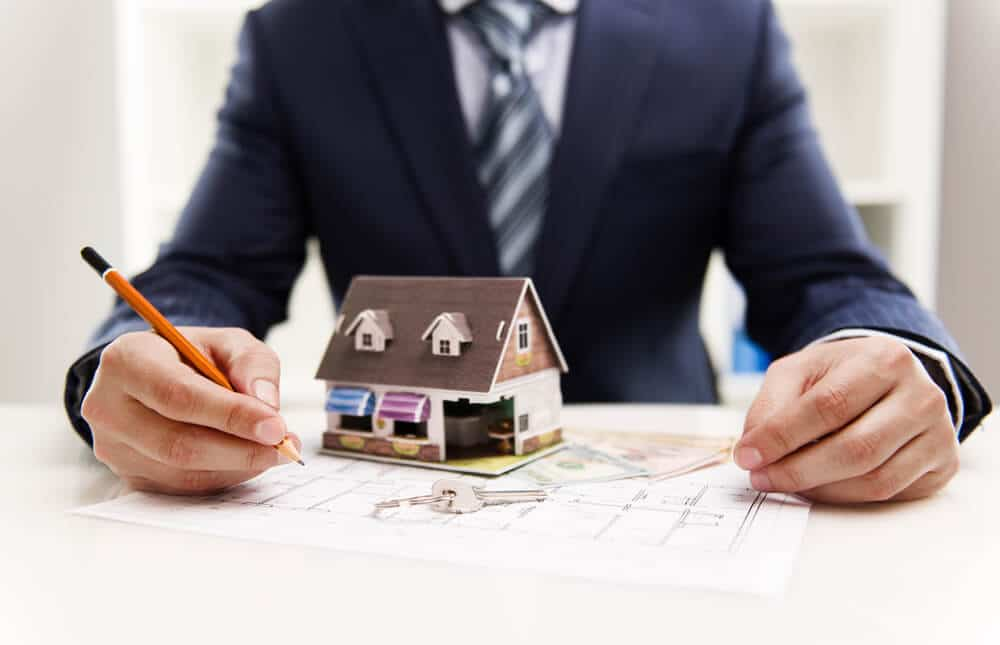

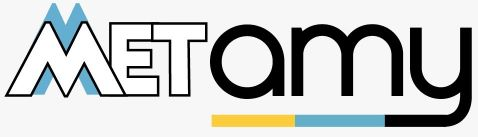